![](https://storage.googleapis.com/kaggle-datasets-images/1972526/3255185/193093ea8d492ba4db58f8aab7c44cf7/dataset-cover.jpg?t=2022-03-04-15-30-00)

# Introduction

## Exploratory Data Analysis (EDA) is an essential step in any data analysis project. It involves exploring and understanding the dataset's structure, variables, patterns, and relationships to derive insights that can help with further analysis and decision-making. In this notebook we are going to analyze restaurant's cuisine ratings data.

# Datasets Story
## Restaurant's cuisine ratings
-User ID: User ID of customers  
-Area code: Area code of customers residence  
-Location: Area and the city of residence of customers  
-Gender: Gender of customer  
-YOB: Year when customer was born  
-Marital Status: Marital status  
-Activity: Customers career status whether student or professional  
-Budget: Budget they may spend in the restaurant  
-Cuisines: Cuisine they preferred/liked the most to have at restaurant  
-Alcohol: Alcohol intake frequency  
-Smoker: Smoking frequency  
-Food Rating: Rating they gave to restaurant's food  
-Service Rating: Rating they gave to restaurant's service  
-Overall Rating: Mean rating calculated from food and service ratings  
-Often A S: Often they visited restaurant or not 

# 1) Importing necessary libraries and settings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
sns.set(rc={"figure.figsize":(18,4)})


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sales-forecasting/train.csv
/kaggle/input/cuisine-rating/Cuisine_rating.csv


# 2) Reading and understanding datasets


In [2]:
df = pd.read_csv("/kaggle/input/cuisine-rating/Cuisine_rating.csv")
def check_df(dataframe, head=5):
    """This function will give us basic information about datasets """
    
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Column Names #####################")
    print(dataframe.info())
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
check_df(df)

##################### Shape #####################
(200, 15)
##################### Column Names #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float

# Analysis of Categorical Variables
### We're going to define a function called grab_col_names, that will seperate categorical, numerical and cardinal variables. This seems easy, since we can use dtype method. However variables also have to be meaningful. Such as if a numerical (integer) variable has less than 10 unique values then we can consider it as a categorical variable. Also if a categorical variable has more than 20 unique values then we can say that it's a cardinal variable and doesn't have categorical meaning.

In [3]:
def grab_col_names(dataframe, cat_th=10,  car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.

    Parameters
    ----------
    dataframe: dataframe
    cat_th: int, float
        threshold value for categorical variables that are hidden in numerical variables
    car_th: int, float
        threshold value for cardinal variables that are hidden in categorical variables

    Returns
    -------
    cat_cols: list
        list of categorical variables
    num_cols: list
        list of numerical variables
    cat_but_car: list
        list of cardinal variables

    Notes
    ------
    cat_cols + num_cols + cat_but_car = total variable number
    num_but_cat is inside of cat_cols

    """
    for col in df.columns:
        if df[col].dtypes == "bool":
            df[col] = df[col].astype(int)
    # This part is importan to see the results in the graphs
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]

    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < 10 and dataframe[col].dtypes in ["int", "float"]]

    cat_but_car = [col for col in dataframe.columns if
                   dataframe[col].nunique() > 20 and str(dataframe[col].dtypes) in ["category", "object"]]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["int", "float"]]
    num_cols = [col for col in num_cols if col not in cat_cols]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [4]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)
print(cat_cols)

Observations: 200
Variables: 15
cat_cols: 12
num_cols: 3
cat_but_car: 0
num_but_cat: 4
['Location', 'Gender', 'Marital Status', 'Activity', 'Cuisines', 'Alcohol ', 'Smoker', 'Often A S', 'Budget', 'Food Rating', 'Service Rating', 'Overall Rating']


### The function below will give each unique values' number in categorical variables and their percentages. Also their countplot bar graphs if it is wanted.

In [5]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")

    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)


                    Location  Ratio
St. George,NY             46   23.0
Upper East Side,NY        30   15.0
Riverdale,NY              28   14.0
Central Park,NY           24   12.0
China Town, NY            22   11.0
Market City, NY           20   10.0
Upper West Side,NY        18    9.0
Central Park,ny            8    4.0
Market City, MY            2    1.0
Cedar Hill, NY             2    1.0
##########################################


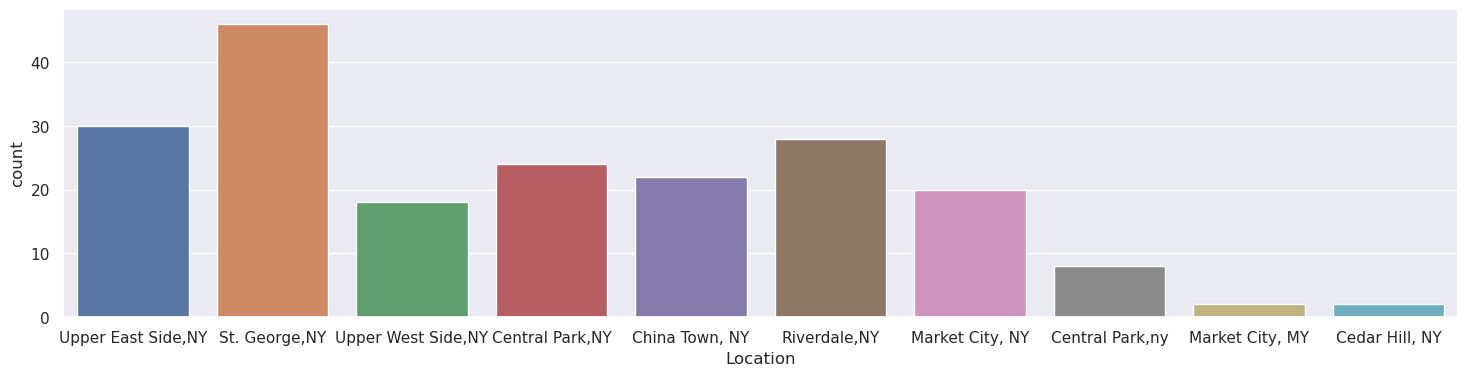

        Gender  Ratio
Male       118   59.0
Female      82   41.0
##########################################


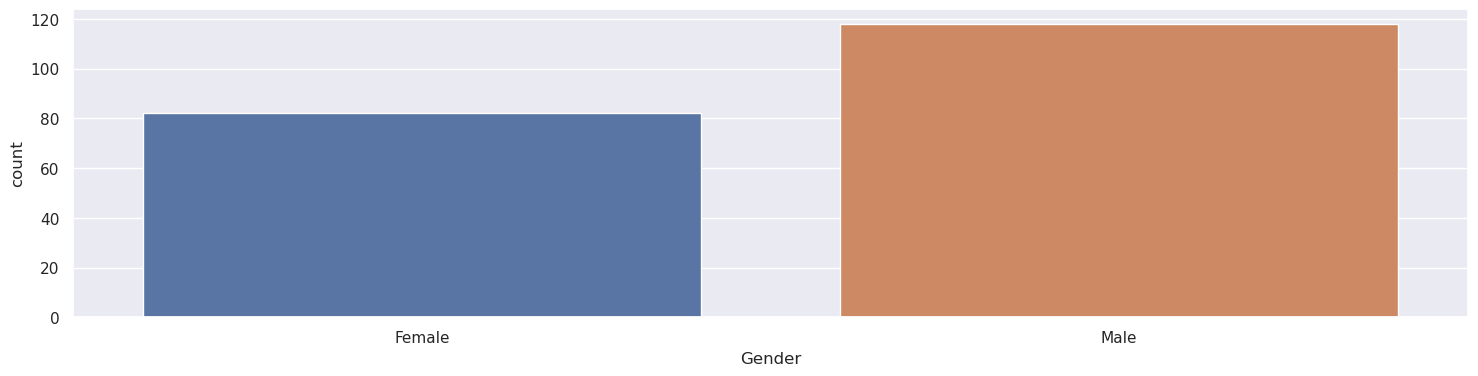

          Marital Status  Ratio
Single               100   50.0
Married               86   43.0
Divorced              14    7.0
##########################################


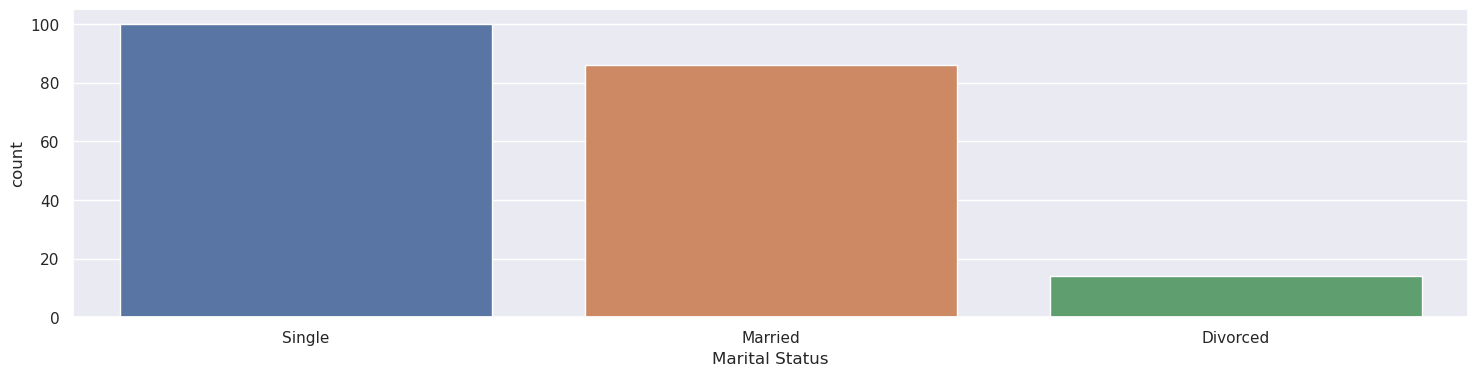

              Activity  Ratio
Student            120   60.0
Professional        80   40.0
##########################################


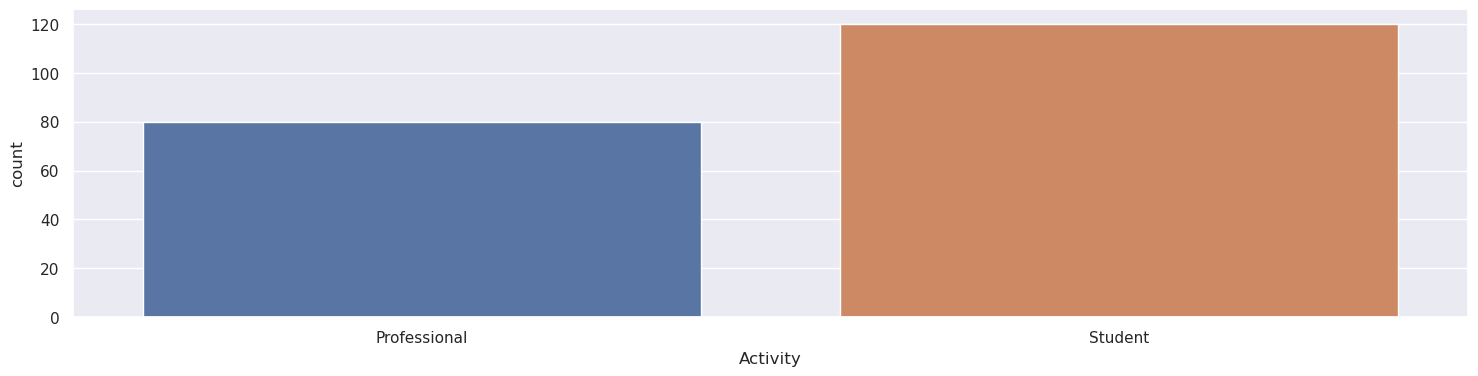

          Cuisines  Ratio
Japanese        36   18.0
Filipino        34   17.0
French          34   17.0
Indian          32   16.0
Chinese         24   12.0
Seafood         22   11.0
Italian         18    9.0
##########################################


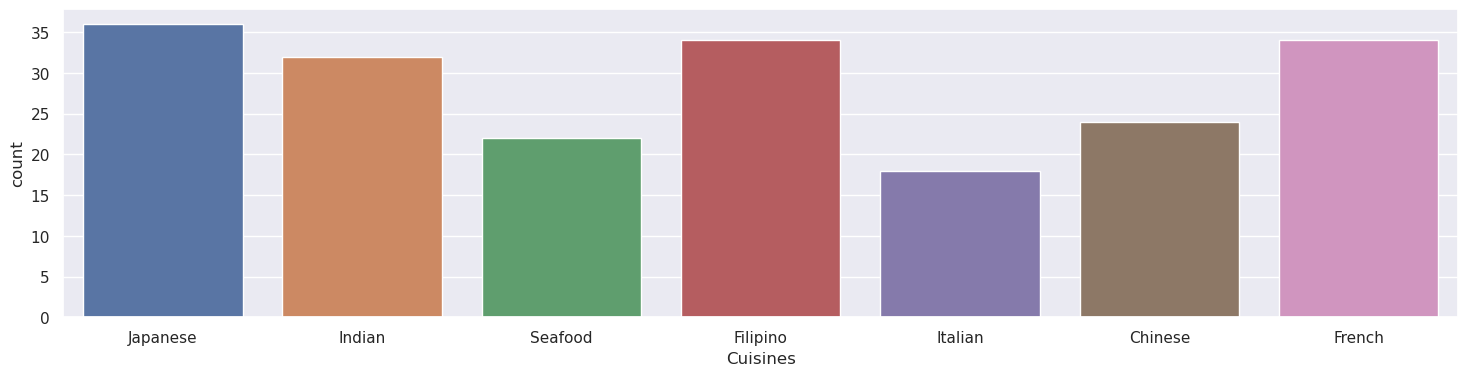

          Alcohol   Ratio
Never           88   44.0
Often           61   30.5
Socially        51   25.5
##########################################


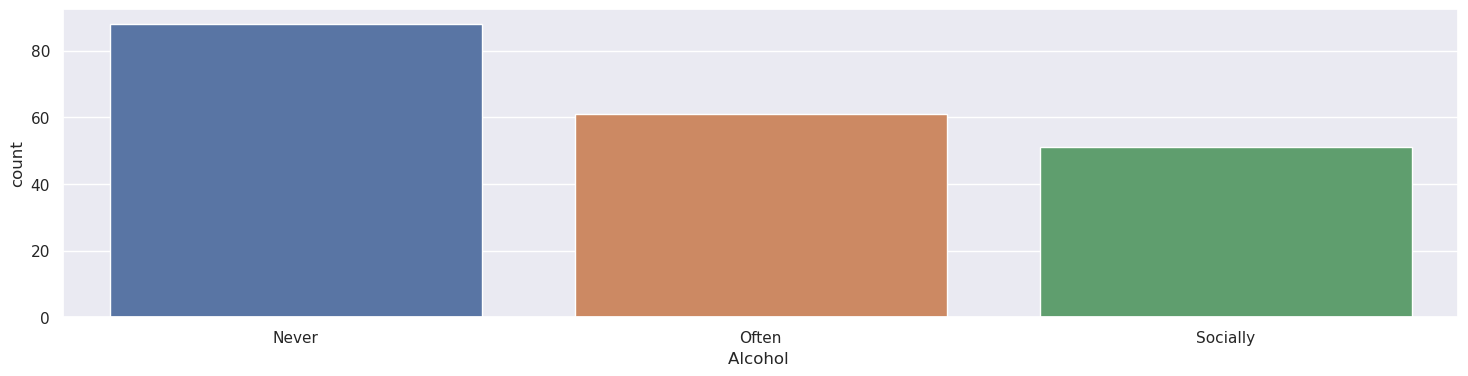

          Smoker  Ratio
Socially      71   35.5
Often         70   35.0
Never         59   29.5
##########################################


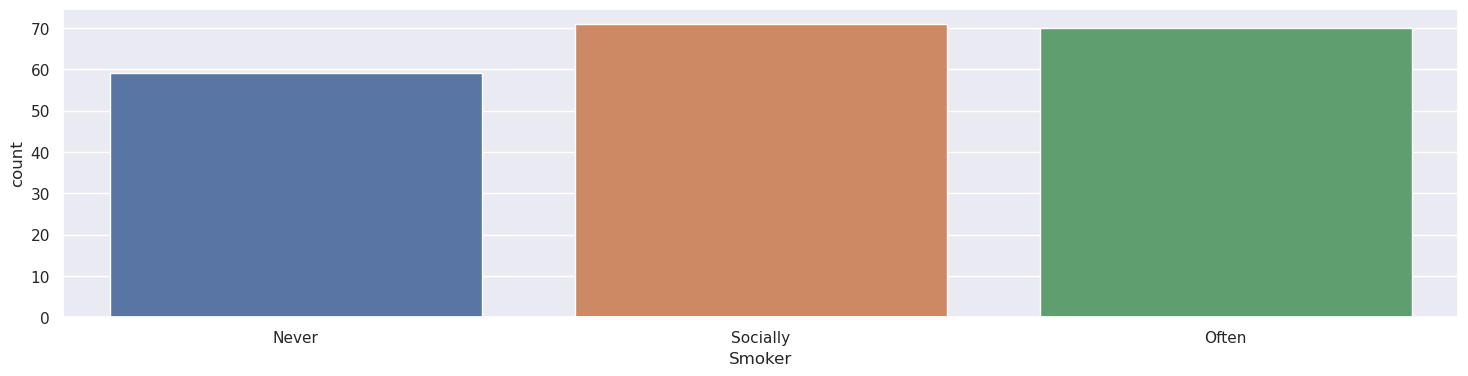

     Often A S  Ratio
No         174   87.0
Yes         26   13.0
##########################################


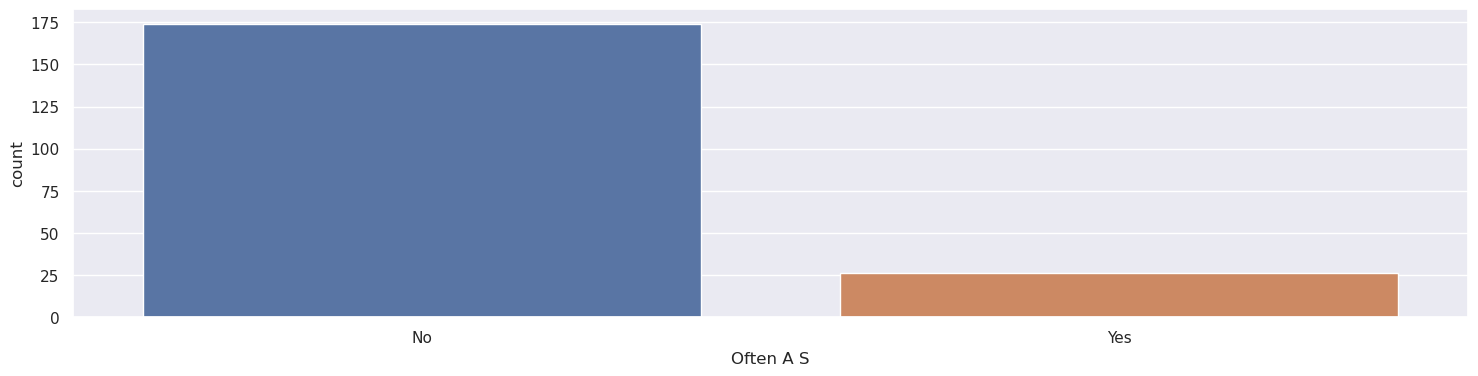

   Budget  Ratio
4      63   31.5
5      62   31.0
3      61   30.5
1      10    5.0
2       4    2.0
##########################################


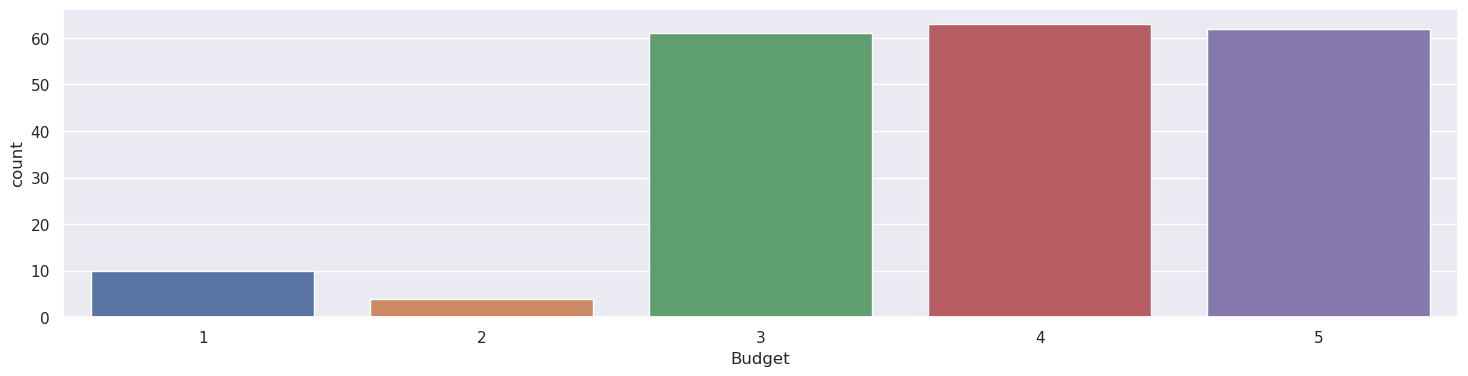

   Food Rating  Ratio
5           53   26.5
3           46   23.0
2           35   17.5
4           35   17.5
1           31   15.5
##########################################


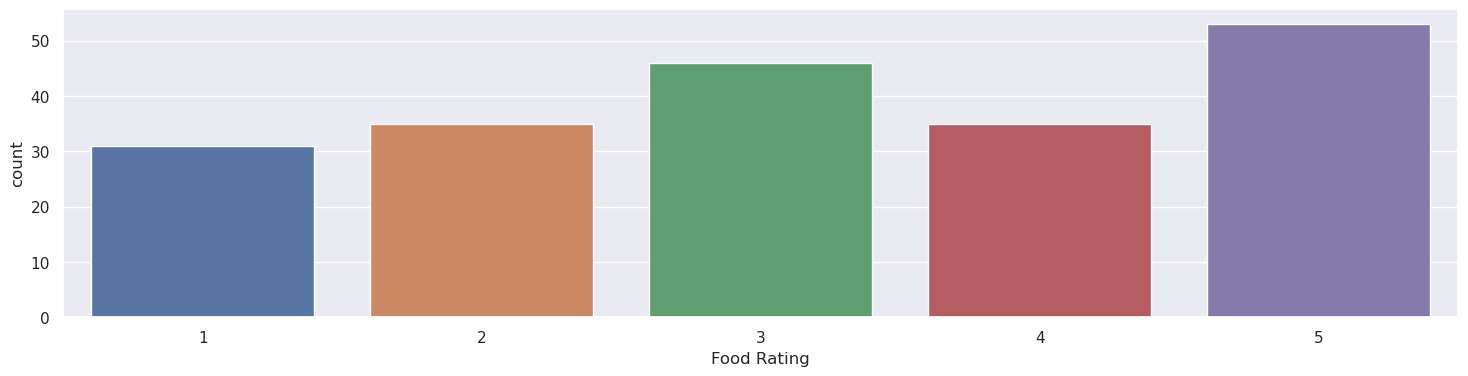

   Service Rating  Ratio
5              66   33.0
2              43   21.5
1              35   17.5
3              29   14.5
4              27   13.5
##########################################


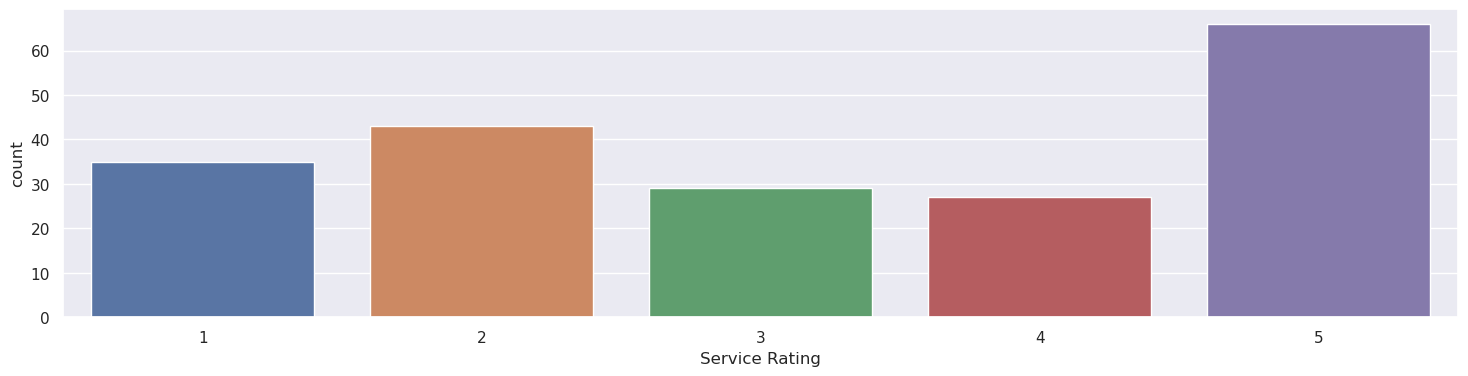

     Overall Rating  Ratio
3.5              35   17.5
3.0              34   17.0
2.5              32   16.0
5.0              29   14.5
4.0              26   13.0
2.0              21   10.5
1.5              11    5.5
4.5               6    3.0
1.0               6    3.0
##########################################


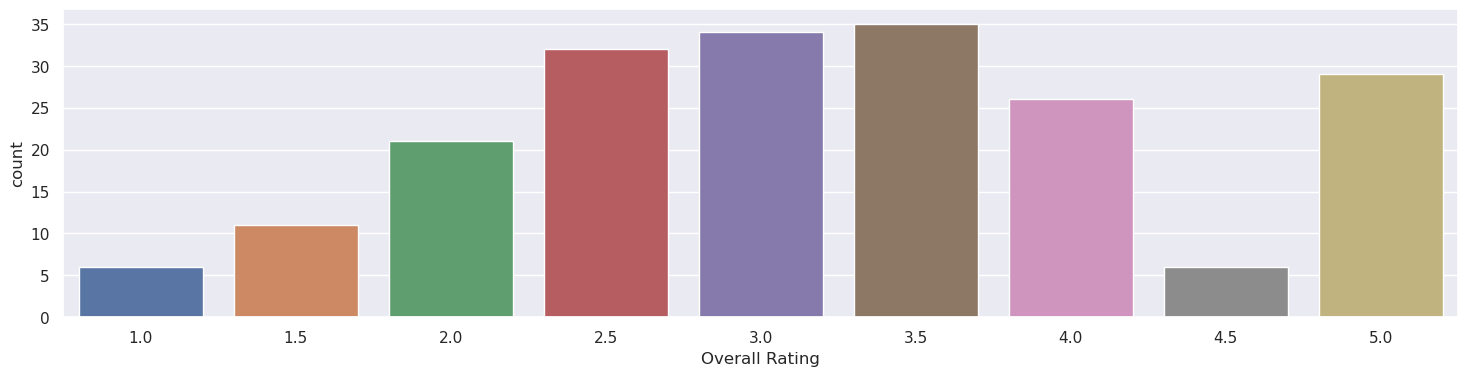

In [6]:
for col in cat_cols:
    cat_summary(df, col, plot=True)

# Analysis of Numerical Variables

### First we choose numerical variables from the datasets, then we avoid numerical (as a type) but categorical variables (num_but_cat) by not choosing them if there is any.

In [7]:
num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in cat_cols]
num_cols

['User ID', 'Area code', 'YOB']

### The function below analyzes numerical variables statistically, and gives their frequency distributions

In [8]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)
    print(dataframe[numerical_col].value_counts())

    if plot:
        dataframe[numerical_col].hist()
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


count    200.000000
mean     100.500000
std       57.879185
min        1.000000
5%        10.950000
10%       20.900000
20%       40.800000
30%       60.700000
40%       80.600000
50%      100.500000
60%      120.400000
70%      140.300000
80%      160.200000
90%      180.100000
95%      190.050000
99%      198.010000
max      200.000000
Name: User ID, dtype: float64
1      1
138    1
128    1
129    1
130    1
      ..
70     1
71     1
72     1
73     1
200    1
Name: User ID, Length: 200, dtype: int64


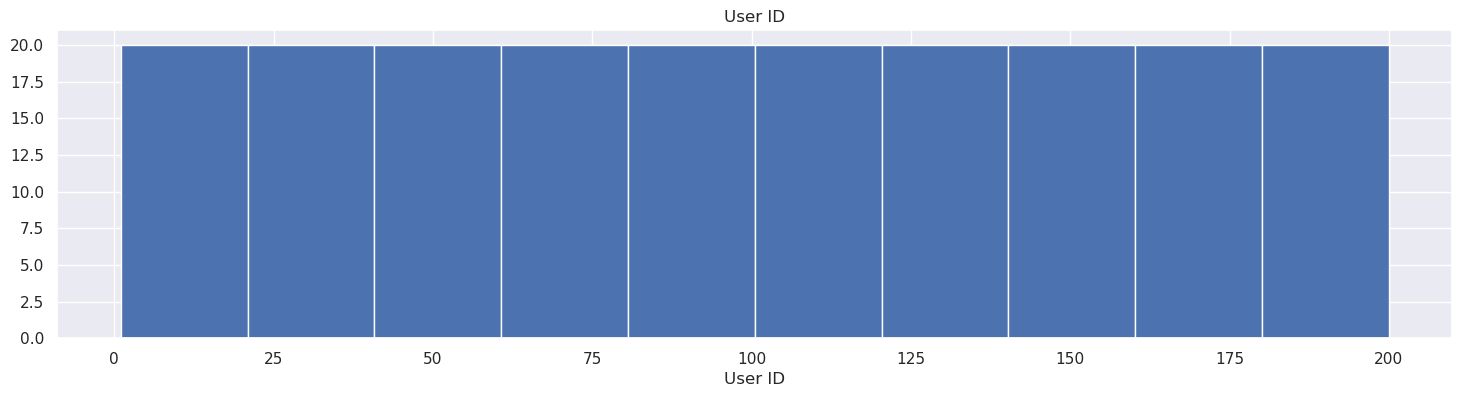

count    200.000000
mean     141.060000
std       26.130257
min      101.000000
5%       107.000000
10%      107.000000
20%      121.800000
30%      123.000000
40%      129.000000
50%      135.000000
60%      153.000000
70%      154.000000
80%      163.600000
90%      179.300000
95%      188.200000
99%      198.000000
max      199.000000
Name: Area code, dtype: float64
123    24
129    17
153    15
107    15
154    14
       ..
120     1
199     1
102     1
106     1
160     1
Name: Area code, Length: 65, dtype: int64


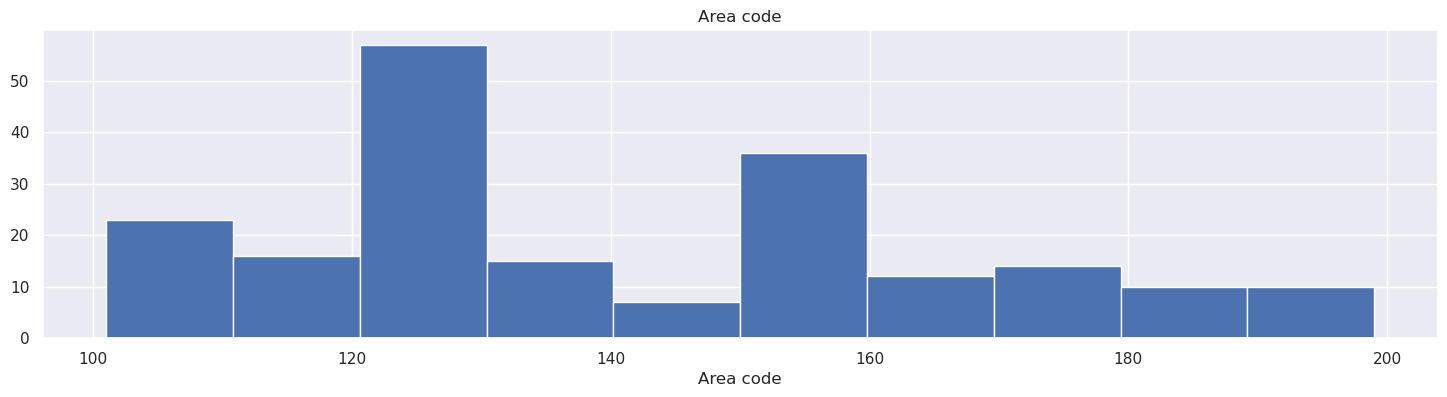

count     200.000000
mean     1984.830000
std        16.809339
min      1955.000000
5%       1956.950000
10%      1960.900000
20%      1966.600000
30%      1974.000000
40%      1978.600000
50%      1987.000000
60%      1995.000000
70%      1999.000000
80%      2001.200000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2009.000000
Name: YOB, dtype: float64
1974    12
2006    10
2000    10
2001     8
1998     8
1995     6
1977     6
2002     6
1969     6
2007     6
1956     6
2003     6
2009     6
1989     4
1976     4
2005     4
1981     4
1962     4
1964     4
1955     4
1996     4
1961     4
1985     4
1987     4
1975     4
1999     4
1988     4
1971     4
1959     4
1991     4
1965     4
1963     4
1990     2
1960     2
1978     2
1979     2
1994     2
1957     2
2004     2
1980     2
1997     2
1958     2
1983     2
1967     2
1986     2
1982     2
Name: YOB, dtype: int64


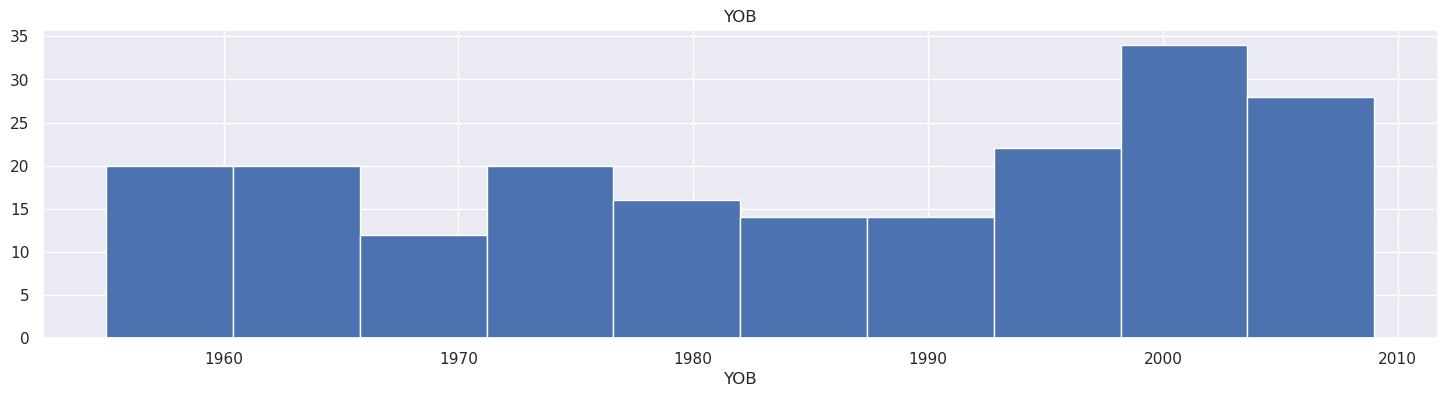

In [9]:
for col in num_cols:
    num_summary(df, col, plot=True)

#### While we are examining charts above, we can say that User ID has no meaning since its a key value for each customer. Area code is also numeric but categorical variable but there are 65 unique values in the columns, therefore our algorithm could not detect it. however a categoric variable with 65 unique values will be hard to examine, so it needs to be segmented by their region to have meaningful meanings. On other hand YOB variable worked well. We can say that restaurant has a diverse range of customers of different ages.

# The Analysis of Target Variable with Categorical and Numeric Variables

In [10]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean()}), end="\n\n\n")
    
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


In [11]:
for col in cat_cols:
    target_summary_with_cat(df, "Overall Rating", col)

                    TARGET_MEAN
Location                       
Cedar Hill, NY         3.500000
Central Park,NY        3.437500
Central Park,ny        3.687500
China Town, NY         3.159091
Market City, MY        3.000000
Market City, NY        3.725000
Riverdale,NY           3.053571
St. George,NY          3.119565
Upper East Side,NY     3.016667
Upper West Side,NY     3.138889


        TARGET_MEAN
Gender             
Female     3.335366
Male       3.148305


                TARGET_MEAN
Marital Status             
Divorced           4.535714
Married            2.872093
Single             3.345000


              TARGET_MEAN
Activity                 
Professional     3.443750
Student          3.079167


          TARGET_MEAN
Cuisines             
Chinese      3.270833
Filipino     3.044118
French       3.102941
Indian       3.171875
Italian      3.194444
Japanese     3.597222
Seafood      3.136364


          TARGET_MEAN
Alcohol              
Never        2.965909
Often        3.393

In [12]:
for col in num_cols:
    target_summary_with_num(df, "Overall Rating", col)

                   User ID
Overall Rating            
1.0              81.833333
1.5             109.363636
2.0              90.666667
2.5              97.656250
3.0              96.970588
3.5             102.628571
4.0             105.269231
4.5             104.000000
5.0             107.827586


                 Area code
Overall Rating            
1.0             146.000000
1.5             140.909091
2.0             140.142857
2.5             139.125000
3.0             141.705882
3.5             143.085714
4.0             139.192308
4.5             155.666667
5.0             138.344828


                        YOB
Overall Rating             
1.0             1974.833333
1.5             1993.909091
2.0             1976.142857
2.5             1988.031250
3.0             1985.441176
3.5             1985.085714
4.0             1980.884615
4.5             1992.000000
5.0             1987.241379




# Conclusion:

#### Through the process of exploratory data analysis, we have gained valuable insights into the factors that contribute to restaurant cuisine ratings.  

#### When we look at the tables above, location or gender does not effect the overall rating, but we can clearly see that divorced people gives more score then single or married ones. Also we see that social drinkers give more score than non-drinkers. Regular customers gives more scores than new ones. On the other hand budget has no effect. Another interesting data is cuisine type does not directly effects overall rating, the restaurant has similar rating in different cuisines. YOB (Year of Birth) also has no direct effect on Overall Rating.  

#### By leveraging the insights gained through our EDA, restaurant owners and managers can develop targeted marketing strategies, menu items, and other initiatives to enhance the customer experience and drive higher ratings.

### Thank you for your suggestions and comments :)
### My linkedin profile: https://www.linkedin.com/in/sefercan-apaydin/
### My Github profile: https://github.com/sefercanapaydin